# 1. Exploración de los datos

Para el presente proyecto disponemos de 5 tablas de datos de ventas de medicamentos correspondientes al laboratorio Cinfa desde enero de 2020 hasta diciembre de 2024.

In [ ]:
import pandas as pd
import numpy as np

df_2020 = pd.read_csv('ventas_KERN_2020.csv')
df_2021 = pd.read_csv('ventas_KERN_2021.csv')
df_2022 = pd.read_csv('ventas_KERN_2022.csv')
df_2023 = pd.read_csv('ventas_KERN_2023.csv')
df_2024 = pd.read_csv('ventas_KERN_2024.csv')

In [ ]:
df_2020.shape

(94, 25)

Todas las tablas tienen 94 medicamentos diferentes y 25 columnas correspondientes a las ventas mensuales y otros datos menos relevantes.

In [ ]:
df_2020['Denominacion'].nunique()

94

In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ABCD             94 non-null     object 
 1   Código           94 non-null     int64  
 2   Denominacion     94 non-null     object 
 3    Existencias     94 non-null     int64  
 4   Mínimo           94 non-null     int64  
 5   Lote             94 non-null     int64  
 6   PVP              94 non-null     float64
 7   PCM              94 non-null     float64
 8   Total            94 non-null     int64  
 9   Ene-20           94 non-null     int64  
 10  Feb-20           94 non-null     int64  
 11  Mar-20           94 non-null     int64  
 12  Abr-20           94 non-null     int64  
 13  May-20           94 non-null     int64  
 14  Jun-20           94 non-null     int64  
 15  Jul-20           94 non-null     int64  
 16  Ago-20           94 non-null     int64  
 17  Sep-20           9

In [ ]:
df_2020.describe()

,Código,Existencias,Mínimo,Lote,PVP,PCM,Total,Ene-20,Feb-20,Mar-20,Abr-20,May-20,Jun-20,Jul-20,Ago-20,Sep-20,Oct-20,Nov-20,Dic-20,Sub categoría 2
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,0.0
mean,730976.946809,2.680851,0.925532,0.797872,6.502979,3.811064,31.063830,9.329787,9.265957,9.148936,8.840426,8.691489,9.361702,9.340426,8.978723,9.180851,9.361702,9.489362,9.574468,NaN
std,92704.439978,3.111590,1.029034,0.824097,8.191497,4.901439,60.671477,4.256275,4.235476,4.227299,4.233261,3.810079,4.058314,4.582701,4.290471,3.983738,3.961783,4.834341,4.463687,NaN
min,652590.000000,0.000000,0.000000,0.000000,0.650000,0.430000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN
25%,664151.250000,1.000000,0.000000,0.000000,2.400000,1.505000,2.250000,6.000000,6.000000,7.000000,6.000000,6.000000,7.000000,6.250000,6.000000,6.000000,7.000000,7.000000,7.000000,NaN
50%,691466.000000,2.000000,1.000000,1.000000,3.385000,2.055000,11.000000,9.000000,8.500000,8.500000,8.000000,8.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,NaN
75%,755827.750000,3.000000,1.000000,1.000000,7.810000,3.950000,25.500000,11.000000,11.750000,11.000000,11.000000,10.000000,11.000000,11.000000,10.750000,11.000000,11.000000,11.000000,12.000000,NaN
max,981803.000000,20.000000,4.000000,3.000000,50.920000,30.530000,353.000000,33.000000,29.000000,34.000000,34.000000,26.000000,29.000000,35.000000,33.000000,25.000000,29.000000,33.000000,30.000000,NaN


* Convertimos las tablas a formato long, eliminamos las colunmnas que no son necesarias y las concatenamos para una mejor exploración de los datos

In [ ]:
def convert_long(df, año):
    df_long = df.melt(
        id_vars=["Código", "Denominacion"],
        value_vars=[col for col in df.columns if "-" in col],  # columnas tipo "Ene-20"
        var_name="Mes",
        value_name="Ventas"
    )
    df_long["Año"] = año
    return df_long

df_2020_long = convert_long(df_2020, 2020)
df_2021_long = convert_long(df_2021, 2021)
df_2022_long = convert_long(df_2022, 2022)
df_2023_long = convert_long(df_2023, 2023)
df_2024_long = convert_long(df_2024, 2024)

df_Cinfa_todo = pd.concat([df_2020_long, df_2021_long, df_2022_long, df_2023_long, df_2024_long], ignore_index=True)

In [ ]:
df_Cinfa_todo.isnull().sum()

,0
Código,0
Denominacion,0
Mes,0
Ventas,0
Año,0


* Mapeamos los meses y creamos una nueva columna con el formato estándar de las fechas.

In [ ]:
mes_map = {'Ene':1, 'Feb':2, 'Mar':3, 'Abr':4, 'May':5, 'Jun':6,
           'Jul':7, 'Ago':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dic':12}

df_Cinfa_todo["Mes_num"]=df_Cinfa_todo["Mes"].str[0:3].map(mes_map)

In [ ]:
df_Cinfa_todo["Fecha"] = pd.to_datetime(dict(
    year=df_Cinfa_todo["Año"],
    month=df_Cinfa_todo["Mes_num"],
    day=1
))

In [ ]:
df_Cinfa_todo.drop(columns=["Mes", "Mes_num", "Año"], inplace=True)

* Separamos los datos en Train y Test

In [ ]:
fecha_corte = "2023-01-01"

df_Cinfa = df_Cinfa_todo[df_Cinfa_todo["Fecha"] < fecha_corte]
df_Cinfa_test  = df_Cinfa_todo[df_Cinfa_todo["Fecha"] >= fecha_corte]

## 1.1. Visualizaciones

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## 1.1.1. Ventas Totales

* Ventas totales por mes

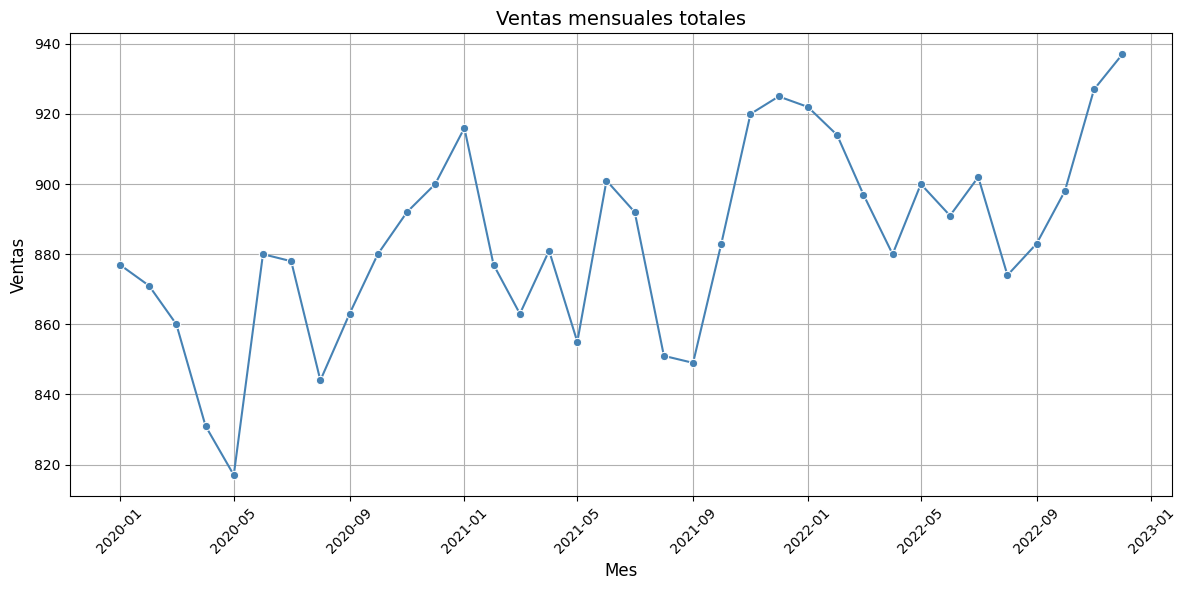

In [ ]:
ventas_mensuales = df_Cinfa.groupby("Fecha")["Ventas"].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=ventas_mensuales.index, y=ventas_mensuales.values, marker='o', color='steelblue')

plt.title("Ventas mensuales totales", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Ventas", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Ventas totales por año

In [ ]:
df_Cinfa["Año"] = df_Cinfa["Fecha"].dt.year
df_Cinfa_total = df_Cinfa.groupby("Año")["Ventas"].sum()

<ipython-input-14-f0067c298627>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cinfa["Año"] = df_Cinfa["Fecha"].dt.year


In [ ]:
df_Cinfa_total = df_Cinfa_total.reset_index()
df_Cinfa_total.columns = ['Año', 'Ventas']

<ipython-input-16-1602d6d71d2b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_Cinfa_total, x='Año', y='Ventas', palette='Blues_d')


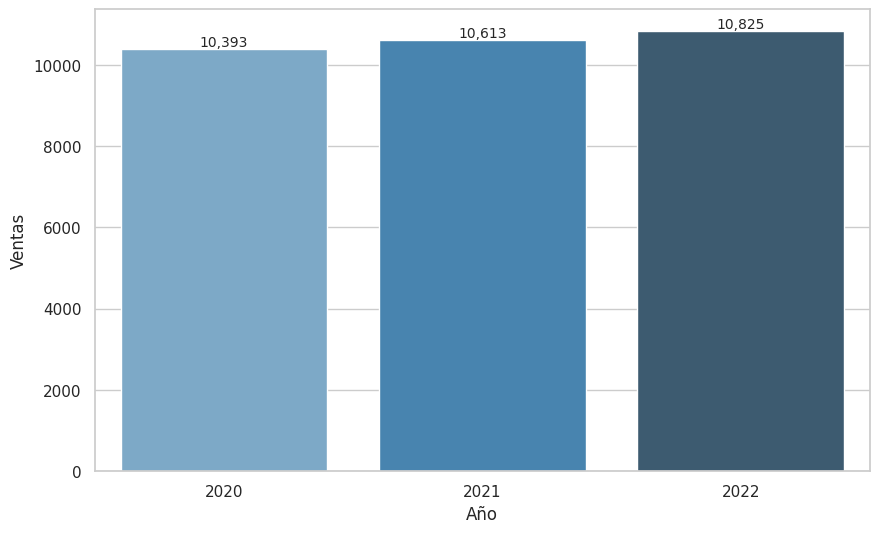

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_Cinfa_total, x='Año', y='Ventas', palette='Blues_d')

# Se añaden las etiquetas
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)


* Medicamentos más vendidos

In [ ]:
df_Cinfa.groupby("Denominacion")["Ventas"].sum().sort_values(ascending=False).head(10)

,Ventas
Denominacion,
PARACETAMOL KERN 1GRX40 CO EFG,1113
PARACETAMOL KERN 1GRX20 CO EFG,1004
DIAZEPAN PRODES 5 MG 30 COMP,783
CLARITROMICINA UNIDIA KERN 500X14 EFG,495
IBUPROFENO KERN 400X30 COM EFG,492
IBUPROFENO KERN 600 MG 20 SOBRES EFG,488
SILDENAFILO KERN 100 MG 4 COMP EFG,487
"TRAMADOL PARACE KERN 37,5/325 20COMP EFG",476
HALOPERIDOL PRODES GOTAS 30 ML,472


## 1.1.2. Productos más vendidos

* Evolución de ventas por productos

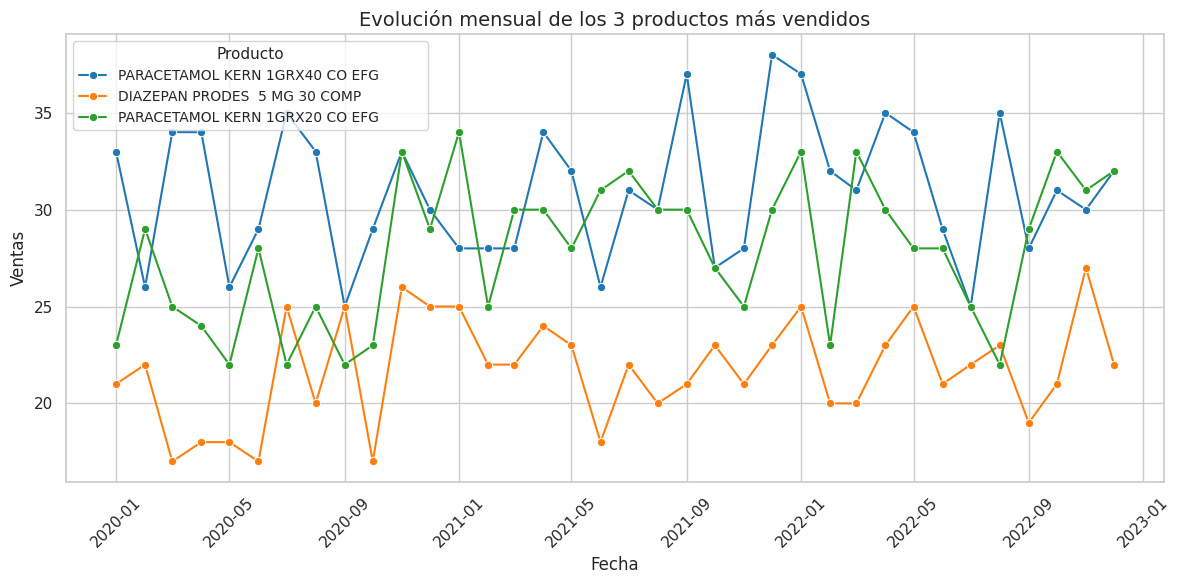

In [ ]:
sns.set(style="whitegrid")

#top 3 productos con más ventas
top_productos = df_Cinfa.groupby("Denominacion")["Ventas"].sum().nlargest(3).index
df_top = df_Cinfa[df_Cinfa["Denominacion"].isin(top_productos)]

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df_top, x="Fecha", y="Ventas", hue="Denominacion", marker='o', palette="tab10")

plt.title("Evolución mensual de los 3 productos más vendidos", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Ventas", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Producto", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.grid(True)
plt.show()

* Ventas totales de los productos más vendidos

<ipython-input-19-7161a96a8e8e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_prod_ventas, x='Denominacion', y='Ventas', palette='Blues_d')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PARACETAMOL KERN 1GRX40'),
  Text(1, 0, 'PARACETAMOL KERN 1GRX20'),
  Text(2, 0, 'DIAZEPAN PRODES  5 MG 3'),
  Text(3, 0, 'CLARITROMICINA UNIDIA K'),
  Text(4, 0, 'IBUPROFENO KERN 400X30 '),
  Text(5, 0, 'IBUPROFENO KERN 600 MG '),
  Text(6, 0, 'SILDENAFILO KERN 100 MG'),
  Text(7, 0, 'TRAMADOL PARACE KERN 37'),
  Text(8, 0, 'HALOPERIDOL PRODES GOTA'),
  Text(9, 0, 'IBUPROFENO KERN 200X20 ')])

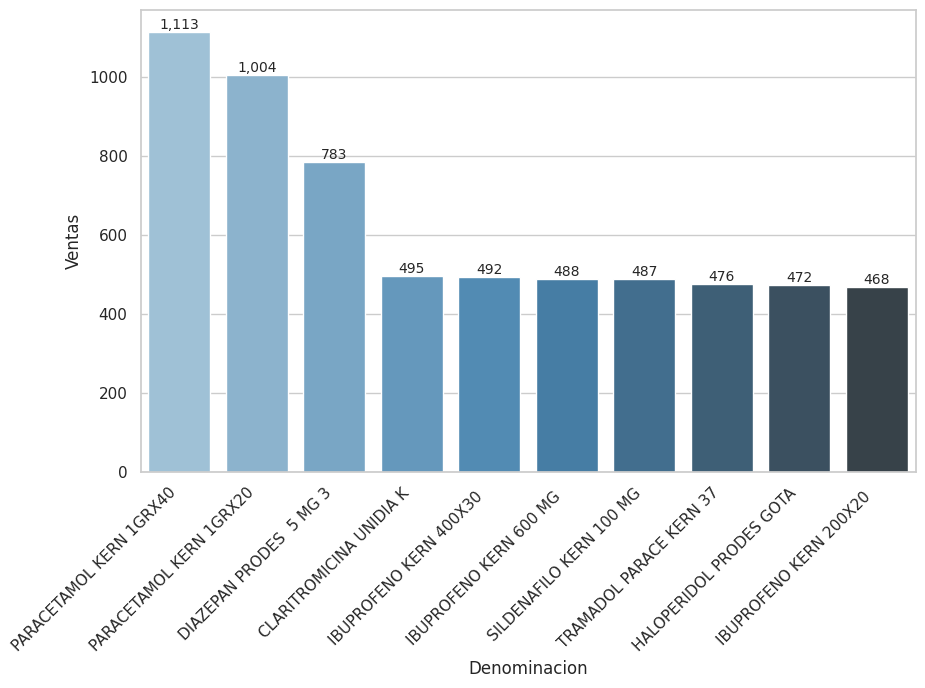

In [ ]:
top_prod_ventas = df_Cinfa.groupby('Denominacion')['Ventas'].sum().nlargest(10).reset_index()
top_prod_ventas['Denominacion'] = top_prod_ventas['Denominacion'].str[:23]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_prod_ventas, x='Denominacion', y='Ventas', palette='Blues_d')

# Etiquetas encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')